# 3.4 IMDB dataset

#### Import libraries

In [1]:
from keras.datasets import imdb
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Download top 10,000 words
- gets 50,000 reviews divided into 2 groups 50%/50%
- 25,000 reviews train data
- 25,000 reviews test data

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
print(train_data.shape, train_labels.shape, len(train_data[0]))
print(test_data.shape, test_labels.shape, len(test_data[0]))
print('train 1st review:', train_data[0][::20], 'label =', train_labels[0])
print('test 1st review',test_data[0][::10], 'label =', test_labels[0])

(25000,) (25000,) 218
(25000,) (25000,) 68
train 1st review: [1, 100, 39, 4, 515, 480, 6, 4, 104, 134, 38] label = 1
test 1st review [1, 2, 4, 124, 27, 8, 32] label = 0


#### Decoding indicies to English words
- gets dict of words -> index
- reverse: creating dict index -> words using dictionary comprehension

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

- decode review number 10 from train data
- decode review number 10 from test data

I do not know why offset is here, what exactly id does, I tried have no offset, it gives completley different list

In [5]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
first_3_value = ' '.join([reverse_word_index.get(i, '?') for i in train_data[10][:3]])
decoded_review_test = ' '. join([reverse_word_index.get(i - 3, '?') for i in test_data[10]])
print('First 3 indicies of train data: ', first_3_value)
print('Train: ', decoded_review)
print('Test: ', decoded_review_test)

First 3 indicies of train data:  the clear fact
Train:  ? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to u

#### Encoding the integer sequences into a binary matrix
- vectorize_sequences puts ones at the place where index is present from 0 to 9999
- resulting matrix is 25,000 x 10,000, 25,000 - reviews, 10,000 count of words we have indices for

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
print(x_train.shape)
print(x_train[0], len(x_train[0]))

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.] 10000


#### Vectorizing labels

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building network

Creating sequential model, I guess because it goes layer by layer. Two hidden layers 16x16 output is either 0 or 1. We do not specify hidden layers input shape because it determines it using previous layer. Activation function is important in order to achieve non linear hypothesis that will fit data well since not all data will be well approximated by linear function. Sigmoid is activation function gives us classification output 0 or 1. Rulu is linear identity for positive numbers where all negative numbers maps to 0; it is a simple activation function, hence quicker computation time.

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


#### Compiling model. Choosing optimizer and loss function.
Optimizer will reduce our loss when loss function will give us loss on our hypothesis

In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Splitting train data on train data and validation data for the model.

In [12]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

Using model fit returns a history object. Model's parameters: features and labels, epochs - how many times go over the data to fit it better, batch size - size that feeds to a model at one time.

In [13]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.4975 - acc: 0.7953 - val_loss: 0.3715 - val_acc: 0.8724
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.2957 - acc: 0.9047 - val_loss: 0.2990 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.2160 - acc: 0.9287 - val_loss: 0.3085 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1742 - acc: 0.9434 - val_loss: 0.2830 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1415 - acc: 0.9541 - val_loss: 0.2863 - val_acc: 0.8851
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1143 - acc: 0.9654 - val_loss: 0.3085 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 1s 87us/step - loss

Getting data from history object: loss on train data, loss on validation data, accuracy

In [14]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

### Plotting the data to see overfitting of the model due times of epochs.

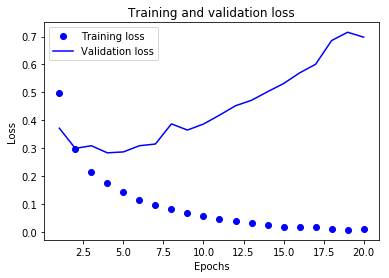

In [15]:
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see how data diverge after 2nd epoch on the validation loss graph, but minimum loss on validation data is at 4th epoch.
***

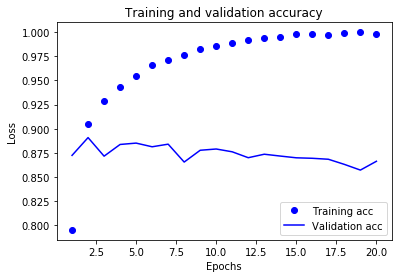

In [16]:
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Validation data minimum seems to be at 8th epoch on the accuracy loss graph.
***

#### Fitting entire train data set, returns loss.
We use 4 epochs because based on validation and accuracy graphs we see overfitting after 4th epoch.

In [17]:
model.fit(x_train, 
          y_train, 
          epochs=4, 
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2237 - acc: 0.9466
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.1420 - acc: 0.9585
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.1135 - acc: 0.9672
Epoch 4/4
25000/25000 [==============================] - 1s 56us/step


In [18]:
print(results)

[0.5024441735243798, 0.8574]


Predicting values using the model.

In [19]:
print(model.predict(x_test))

[[0.02125818]
 [0.9999988 ]
 [0.994634  ]
 ...
 [0.2057597 ]
 [0.12904012]
 [0.7516391 ]]


---
## 3.5 Classifying newswires: a multiclass classification

#### Download top 10,000 words
- gets 11,228 newswires divided into 2 groups
- 8,982 newswires train data
- 2,246 newswires test data

In [20]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

#### Decoding indicies to English words
- gets dict of words -> index
- reverse: creating dict index -> words using dictionary comprehension

In [21]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

- decode newswire number 0 from train data

I couldn't find how to decode topics. I think it is an interesting think do discover, but I only find some people's solutions to map topics.

In [22]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


#### Vectorizing the data using function from 3.4

In [23]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Vectorizing lables
Function that vectorize labels of 46 topics.

In [24]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

Using one hot vectorization for labels which is similar to vectorization of data, but insdead with different dimensions - 46 long because 46 topics. I did not use built-in _categorical encoding_.

In [25]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### Bulding the model for multiple variable data

Creating sequential model. Two hidden layers 64x64 output is one of the 46 topics [0,45]. We do not specify hidden layers input shape because it determines dimensions using previous layer. Activation function is important in order to achieve non linear hypothesis that will fit data well since not all data will be well approximated by linear function. Softmax is activation function that gives probability of newswire to belong to one of 46 topics. Rulu is linear identity for positive numbers where all negative numbers maps to 0; it is a simple activation function, hence quicker computation time.

In [26]:
model_multi = models.Sequential()
model_multi.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model_multi.add(layers.Dense(64, activation='relu'))
model_multi.add(layers.Dense(46, activation='softmax'))

#### Compile model

Categorical crossentropy is used because of there are more then 2(binary) outputs.

In [27]:
model_multi.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Splitting data the same fashion we did in 3.4, but we take first 1,000 samples.

In [28]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Fitting over 20 epochs to make graphs based on history object we get.

In [29]:
history = model_multi.fit(partial_x_train, 
                          partial_y_train, 
                          epochs=20, 
                          batch_size=512, 
                          validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 81us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

### Plotting the data
Let's see how model overfits the given training data.

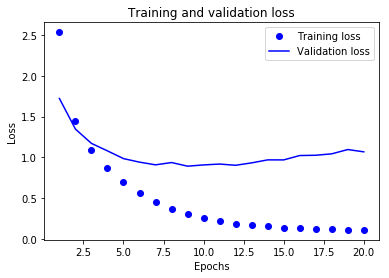

In [31]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see how data diverge after 3rd epoch on the validation loss graph.
***

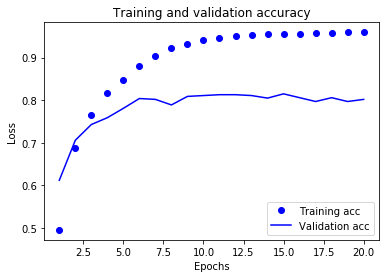

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Data diverge after 3rd apoch on the accuracy loss graph.
***

#### Fitting data
Based on graphs' losses we the minimum loss by the book is 9, but in my unprofessional opiniton it looks like 8 just based on the graphs. I'm fitting over both of the epochs to see the difference.

***
_Model with 9 epochs_

In [33]:
model_multi.fit(partial_x_train, 
                partial_y_train, 
                epochs=9, 
                batch_size=512, 
                validation_data=(x_val, y_val))
results = model_multi.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 64us/step - loss: 0.1055 - acc: 0.9575 - val_loss: 1.1033 - val_acc: 0.7990
Epoch 2/9
7982/7982 [==============================] - 1s 63us/step - loss: 0.1019 - acc: 0.9579 - val_loss: 1.1133 - val_acc: 0.8020
Epoch 3/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.1028 - acc: 0.9592 - val_loss: 1.0965 - val_acc: 0.7960
Epoch 4/9
7982/7982 [==============================] - 1s 71us/step - loss: 0.1030 - acc: 0.9575 - val_loss: 1.1221 - val_acc: 0.7970
Epoch 5/9
7982/7982 [==============================] - 1s 68us/step - loss: 0.0970 - acc: 0.9590 - val_loss: 1.1496 - val_acc: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 71us/step - loss: 0.0988 - acc: 0.9565 - val_loss: 1.2267 - val_acc: 0.7870
Epoch 7/9
7982/7982 [==============================] - 1s 67us/step - loss: 0.0960 - acc: 0.9575 - val_loss: 1.1766 - val_acc: 0.7990
Epoch 8/9
7982

#### Loss values

In [34]:
print(results)

[1.3464759400351602, 0.7796081923950174]


#### Predict using model

In [35]:
prediction = model_multi.predict(x_test)

In [36]:
print('Shape of prediction:', prediction.shape)
print('Length of the each prediction:', prediction[0].shape)
print('All 46 predictions:', prediction[0])
print('Index of the maximum probability:', np.argmax(prediction[0]))
print('Probability of the topic:', prediction[0][np.argmax(prediction[0])])

Shape of prediction: (2246, 46)
Length of the each prediction: (46,)
All 46 predictions: [1.13866543e-06 9.05847116e-07 1.09319742e-09 9.59693372e-01
 3.31417024e-02 1.09716992e-10 8.07377568e-11 5.54451617e-06
 1.76339614e-04 7.37279777e-07 4.24510790e-06 2.91883363e-04
 2.69567099e-05 3.44733536e-07 1.13270367e-07 4.61116167e-09
 3.92252434e-04 4.98006216e-07 5.75993317e-06 1.16806630e-04
 5.73063456e-03 3.33316624e-04 4.60053656e-07 1.23548984e-08
 8.64893508e-08 2.48290064e-08 1.57955550e-12 1.16112190e-07
 6.39978225e-06 3.72466005e-08 4.21593249e-05 1.97366887e-10
 8.97728296e-06 5.14797005e-09 4.62761000e-06 7.78806992e-08
 1.36629760e-05 2.81590005e-08 4.76914693e-07 8.30424396e-10
 9.12737974e-08 5.40049605e-08 3.40857831e-08 1.92966421e-09
 1.06590665e-11 9.47589229e-11]
Index of the maximum probability: 3
Probability of the topic: 0.9596934


For newswire #1 model predicts most likely topic is #3

***
_Model with 8 epochs_

In [37]:
model_multi.fit(partial_x_train, 
                partial_y_train, 
                epochs=8, 
                batch_size=512, 
                validation_data=(x_val, y_val))
results = model_multi.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 66us/step - loss: 0.0924 - acc: 0.9585 - val_loss: 1.2270 - val_acc: 0.7920
Epoch 2/8
7982/7982 [==============================] - 1s 63us/step - loss: 0.0913 - acc: 0.9577 - val_loss: 1.2493 - val_acc: 0.7760
Epoch 3/8
7982/7982 [==============================] - 1s 71us/step - loss: 0.0908 - acc: 0.9579 - val_loss: 1.1834 - val_acc: 0.7960
Epoch 4/8
7982/7982 [==============================] - 1s 65us/step - loss: 0.0902 - acc: 0.9579 - val_loss: 1.2577 - val_acc: 0.7720
Epoch 5/8
7982/7982 [==============================] - 1s 63us/step - loss: 0.0901 - acc: 0.9570 - val_loss: 1.2696 - val_acc: 0.7820
Epoch 6/8
7982/7982 [==============================] - 1s 65us/step - loss: 0.0887 - acc: 0.9604 - val_loss: 1.2348 - val_acc: 0.8040
Epoch 7/8
7982/7982 [==============================] - 1s 68us/step - loss: 0.0859 - acc: 0.9597 - val_loss: 1.3146 - val_acc: 0.7860
Epoch 8/8
2246

#### Loss values

In [38]:
print(results)

[1.4993492864861833, 0.772484416793949]


#### Predict using model

In [39]:
prediction = model_multi.predict(x_test)

In [40]:
print('Shape of prediction:', prediction.shape)
print('Length of the each prediction:', prediction[0].shape)
print('All 46 predictions:', prediction[0])
print('Index of the maximum probability:', np.argmax(prediction[0]))
print('Probability of the topic:', prediction[0][np.argmax(prediction[0])])

Shape of prediction: (2246, 46)
Length of the each prediction: (46,)
All 46 predictions: [1.00113020e-07 3.80559328e-07 3.10824491e-11 9.80880976e-01
 1.86291393e-02 6.73913453e-13 7.75694342e-14 1.45866537e-07
 1.41972932e-05 2.24846943e-07 2.02239633e-07 4.10759822e-05
 1.33442529e-06 9.05465303e-09 1.05975175e-08 2.72464638e-11
 6.48850255e-05 2.05766284e-08 2.96557459e-07 2.53107391e-05
 2.79047468e-04 5.71118399e-05 2.01159267e-08 1.04313436e-09
 4.68202632e-09 2.24185936e-09 1.50921948e-15 9.89320292e-10
 3.99575811e-07 2.00572128e-10 3.76544722e-06 1.50645433e-13
 7.15741976e-07 9.93797752e-12 8.33702529e-08 2.25370100e-09
 6.34880791e-07 5.75465064e-10 2.55388617e-08 1.83377098e-12
 4.68981121e-09 3.91488869e-10 1.11503473e-10 6.65186439e-12
 2.39816322e-14 1.02210585e-13]
Index of the maximum probability: 3
Probability of the topic: 0.980881


For newswire #1 model predicts most likely topic is #3

***
Based on both models topic for newswire is 3rd topic, but by the numbers model with 9 epochs makes stronger prediction in this case.